In [1]:
import matplotlib.pyplot as plt


In [2]:
import logging
logger = logging.getLogger('tensorflow')
logger.setLevel(logging.ERROR)  # Only show errors, not warnings or info


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses all logs except errors


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set dataset paths
# Set dataset paths
train_dir = "/home/diing/projects/marinewastedetection/dataset/train"
test_dir = "/home/diing/projects/marinewastedetection/dataset/test"


# Image parameters
IMG_SIZE = (128, 128)  # Resize images for uniformity
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Normalize pixel values
    rotation_range=15,       # Augmentations
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training and testing datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


E0000 00:00:1736429027.076068   25179 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736429027.079322   25179 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1720 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [5]:
import tensorflow as tf

# Check if TensorFlow can detect the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {gpus}")
    try:
        # Test if GPU is available for computation
        tf.debugging.set_log_device_placement(True)
        # Create a simple tensor and run on GPU
        with tf.device('/GPU:0'):
            # Simple operation to test GPU
            tensor = tf.random.normal([10000, 10000])
            result = tf.matmul(tensor, tensor)
            print("Tensor computation completed on GPU")
    except RuntimeError as e:
        print(f"Error with GPU: {e}")
else:
    print("No GPU detected. Running on CPU.")


GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
_EagerConst: (_EagerConst): /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
shape: (_DeviceArg): /job:localhost/replica:0/task:0/device:CPU:0
RandomStandardNormal: (RandomStandardNormal): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomStandardNormal in devic

I0000 00:00:1736429028.677333   25179 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


x: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
y: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Mul: (Mul): /job:localhost/replica:0/task:0/device:GPU:0
z_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
x: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
y: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
AddV2: (AddV2): /job:localhost/replica:0/task:0/device:GPU:0
z_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
a: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
b: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
MatMul: (MatMul): /job:localhost/replica:0/task:0/device:GPU:0
product_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Tensor computation completed on GPU


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
x: (_DeviceArg): /job:localhost/replica:0/task:0/device:GPU:0
Cast: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
y_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
resource_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
VarHandleOp: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
value: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
AssignVariableOp: (AssignVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/dev

/home/diing/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


x: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Cast: (Cast): /job:localhost/replica:0/task:0/device:GPU:0
y_RetVal: (_DeviceRetval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
seed: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
StatelessRandomGetKeyCounter: (StatelessRandomGetKeyCounter): /job:localhost/replica:0/task:0/device:GPU:0
key_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
counter_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
shape: (_DeviceAr

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import scipy
print(scipy.__version__)
from scipy import ndimage


1.13.1


In [8]:
# Train the model
EPOCHS = 50

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data,
    verbose=1  # Displays only the progress bar
)

# Save the model
model.save("marine_pollution_model.h5")


/home/diing/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


components_0: (_DeviceArg): /job:localhost/replica:0/task:0/device:CPU:0
TensorDataset: (TensorDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
FlatMapDataset: (FlatMapDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
buffer__size: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
PrefetchDataset: (PrefetchDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDatase

I0000 00:00:1736429032.266086   25343 service.cc:148] XLA service 0x7fea200069b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736429032.266309   25343 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
I0000 00:00:1736429032.548226   25343 cuda_dnn.cc:529] Loaded cuDNN version 90300


optional: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
OptionalHasValue: (OptionalHasValue): /job:localhost/replica:0/task:0/device:GPU:0
has__value_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
optional: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
OptionalGetValue: (OptionalGetValue): /job:localhost/replica:0/task:0/device:GPU:0
components_0_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
components_1_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
start: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
limit: (_

I0000 00:00:1736429034.718869   25343 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
 3/54 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - accuracy: 0.3924 - loss: 0.9598Executing op __inference_multi_step_on_iterator_2154 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerCons

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
input: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
Identity: (Identity): /job:localhost/replica:0/task:0/device:GPU:0
output_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
ReadVariableOp: (ReadVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
value_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
ReadVariableOp: (ReadVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
value_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/repli

components_0: (_DeviceArg): /job:localhost/replica:0/task:0/device:CPU:0
TensorDataset: (TensorDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
FlatMapDataset: (FlatMapDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
buffer__size: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
PrefetchDataset: (PrefetchDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVari

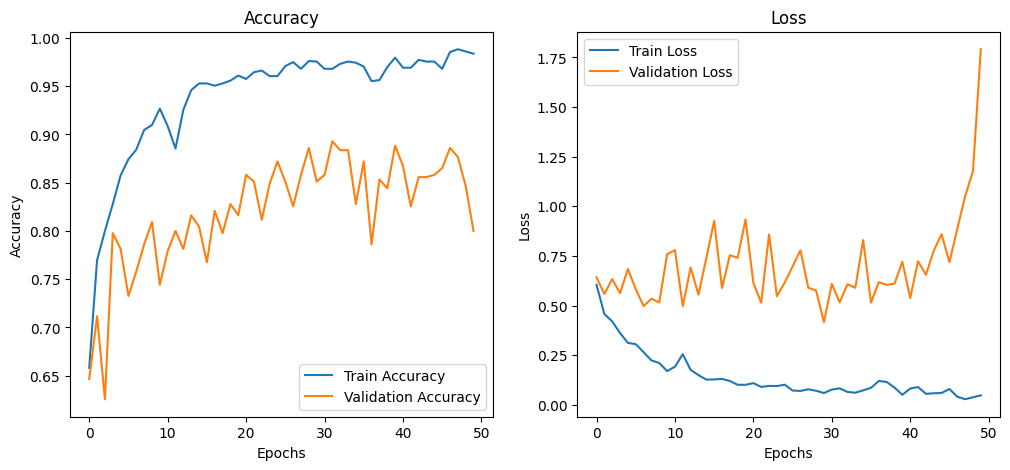

In [9]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replic

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
value: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
AssignVariableOp: (AssignVariableOp): /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
start: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
stop: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
step: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
RangeDataset: (RangeDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/

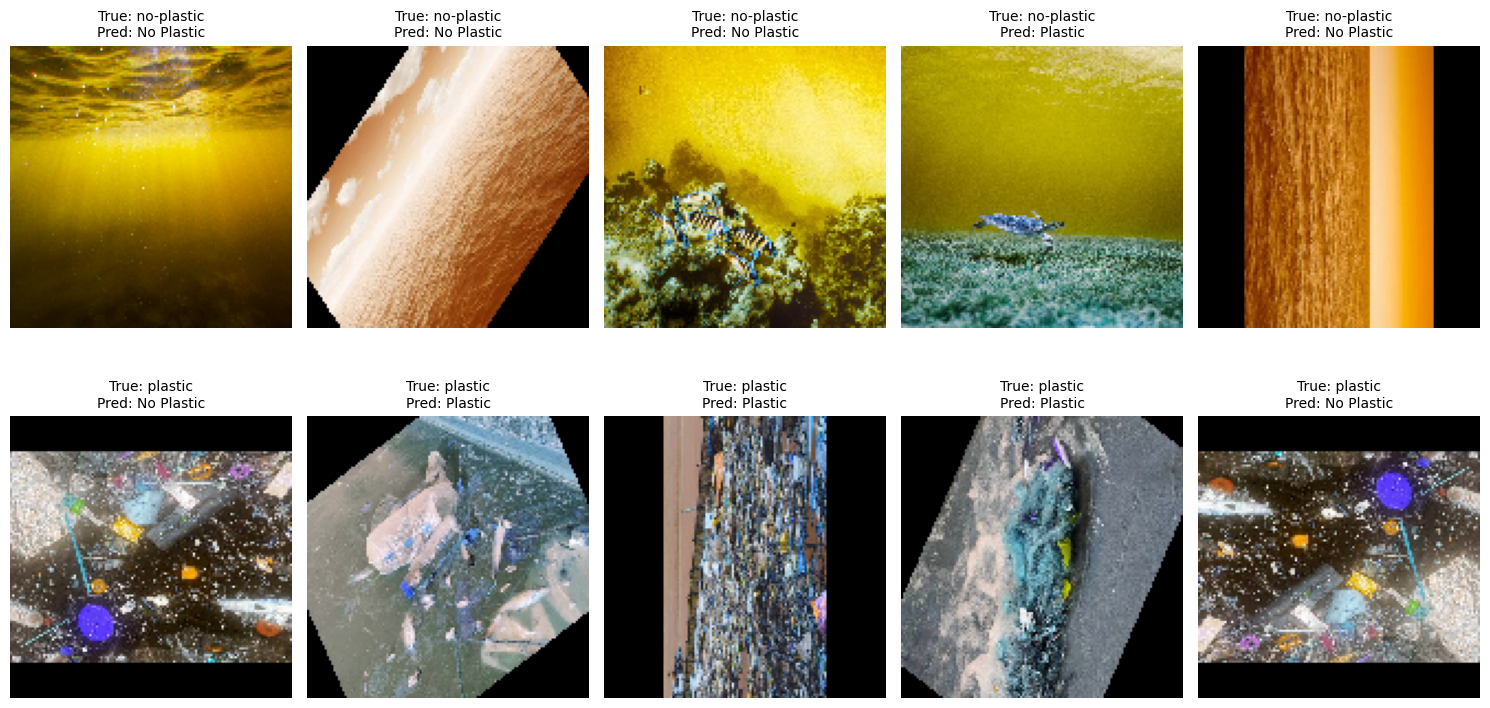

In [10]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to pick 10 random images from the dataset
def pick_random_images(dataset_path, num_images=10):
    all_images = []
    labels = []
    
    for label in os.listdir(dataset_path):  # Iterate over 'plastic' and 'no plastic' folders
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            image_files = os.listdir(label_path)
            selected_files = random.sample(image_files, min(len(image_files), num_images // 2))
            all_images.extend([os.path.join(label_path, img) for img in selected_files])
            labels.extend([label] * len(selected_files))
    
    return all_images, labels

# Predict and display the images
def predict_and_display(model, images, labels, img_size=(128, 128)):
    plt.figure(figsize=(15, 8))
    
    for i, img_path in enumerate(images):
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict using the model
        prediction = model.predict(img_array)
        predicted_label = "Plastic" if prediction[0][0] > 0.5 else "No Plastic"

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {labels[i]}\nPred: {predicted_label}", fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Example usage
dataset_path = "/home/diing/projects/marinewastedetection/dataset/test"  # Path to your test dataset
random_images, true_labels = pick_random_images(dataset_path, num_images=10)

# Load the saved model
model = tf.keras.models.load_model("marine_pollution_model.h5")

# Predict and display results
predict_and_display(model, random_images, true_labels)


In [11]:
from tensorflow.keras.preprocessing import image

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Plastic" if prediction[0][0] > 0.5 else "No Plastic"

# Example usage
model = tf.keras.models.load_model("marine_pollution_model.h5")
result = classify_image("path_to_new_image.jpg", model)
print(f"Prediction: {result}")


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_new_image.jpg'

components_0: (_DeviceArg): /job:localhost/replica:0/task:0/device:CPU:0
TensorDataset: (TensorDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
FlatMapDataset: (FlatMapDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
input__dataset: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
buffer__size: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
PrefetchDataset: (PrefetchDataset): /job:localhost/replica:0/task:0/device:CPU:0
handle_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousI

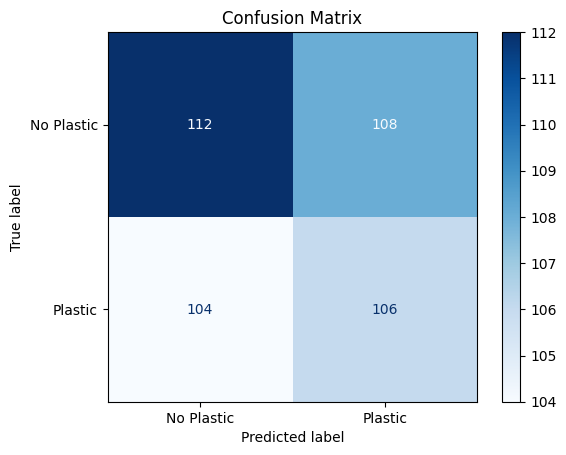

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# True labels
y_true = test_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Plastic", "Plastic"])

# Plot
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


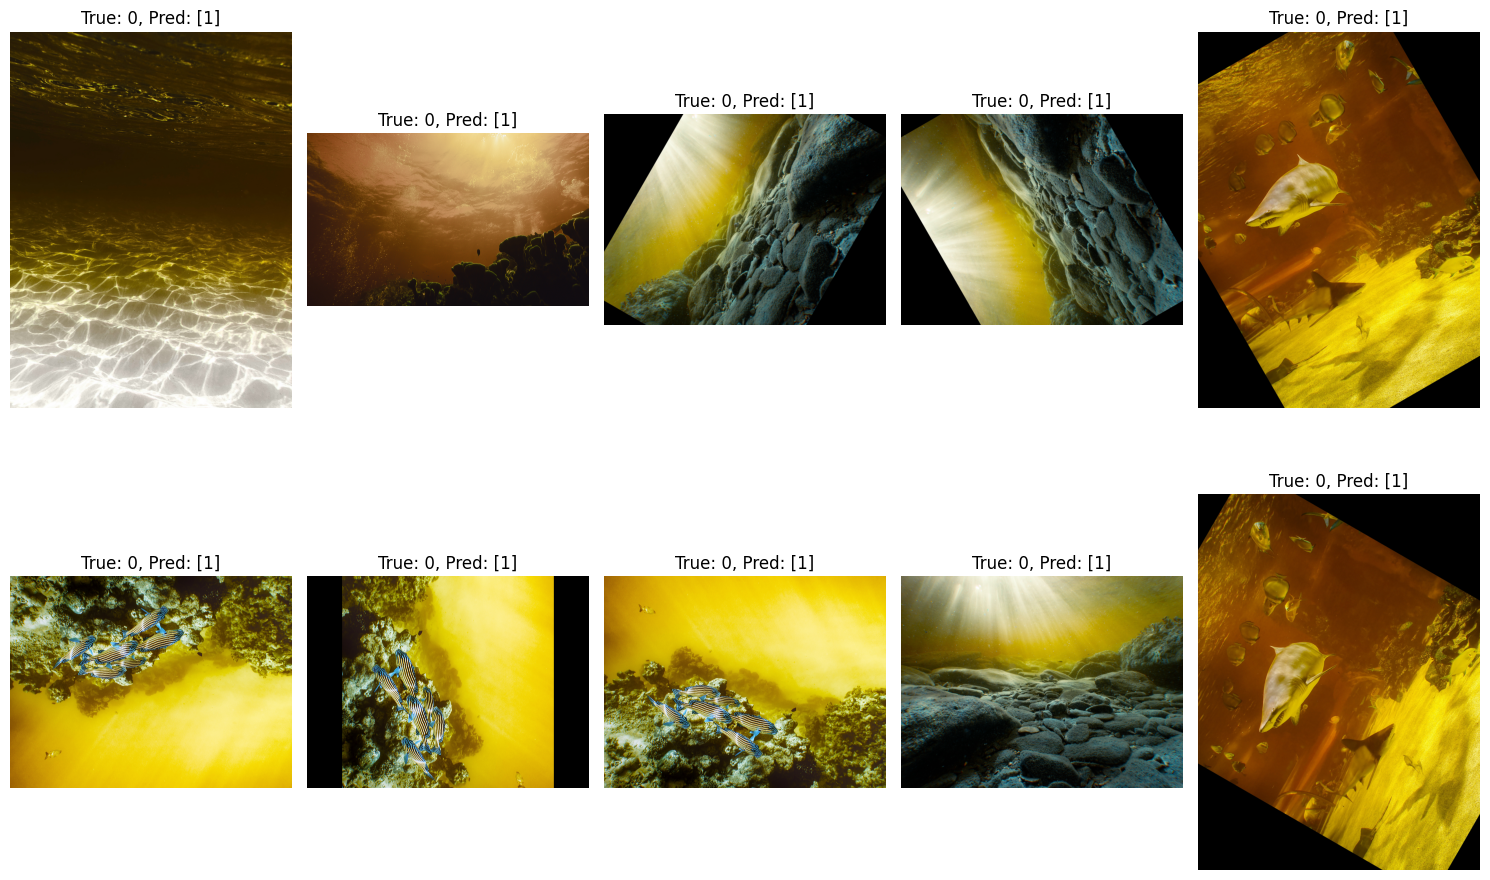

In [20]:
# Display misclassified images
misclassified_indices = [i for i in range(len(y_true)) if y_true[i] != y_pred[i]]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:10]):  # Show up to 10 misclassified images
    img, true_label, pred_label = test_data.filepaths[idx], y_true[idx], y_pred[idx]
    plt.subplot(2, 5, i + 1)
    plt.imshow(plt.imread(img))
    plt.axis('off')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.preprocessing import image

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Plastic" if prediction[0][0] > 0.5 else "No Plastic"

# Example usage
model = tf.keras.models.load_model("marine_pollution_model.h5")
result = classify_image("/home/diing/projects/marinewastedetection/3.jpg", model)
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Prediction: No Plastic


In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("marine_pollution_model.h5")

# Define the labels for your classes
labels = ["No Plastic", "Plastic"]

# Initialize webcam
cap = cv2.VideoCapture(0)  # 0 is the default camera

# Set frame dimensions (optional)
cap.set(3, 640)  # Width
cap.set(4, 480)  # Height

# Function to preprocess frames for prediction
def preprocess_frame(frame, img_size=(128, 128)):
    resized_frame = cv2.resize(frame, img_size)  # Resize frame to model's input size
    normalized_frame = resized_frame / 255.0    # Normalize pixel values
    return np.expand_dims(normalized_frame, axis=0)  # Add batch dimension

# Loop for real-time prediction
try:
    while True:
        ret, frame = cap.read()  # Read a frame from the webcam
        if not ret:
            break
        
        # Preprocess the frame
        input_frame = preprocess_frame(frame)
        
        # Predict using the model
        prediction = model.predict(input_frame)
        predicted_label = labels[np.argmax(prediction)]
        
        # Overlay the prediction on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f"Prediction: {predicted_label}", (10, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Display the frame with prediction
        cv2.imshow("Camera Feed - Press 'q' to exit", frame)
        
        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Interrupted by user.")

finally:
    # Release resources
    cap.release()
    cv2.destroyAllWindows()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:loca

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


[ WARN:0@19.351] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@19.351] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
